##### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

##### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean  
Ambient temperature (AT) C â€“6.23 37.10 17.71  
Ambient pressure (AP) mbar 985.85 1036.56 1013.07  
Ambient humidity (AH) (%) 24.08 100.20 77.87  
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93  
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56  
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43  
Turbine after temperature (TAT) C 511.04 550.61 546.16  
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06  
Turbine energy yield (TEY) MWH 100.02 179.50 133.51  
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37  
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29  

In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np

import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set

df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
# Dropping duplicates

df = df.drop_duplicates()
df.shape

(15039, 11)

In [6]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


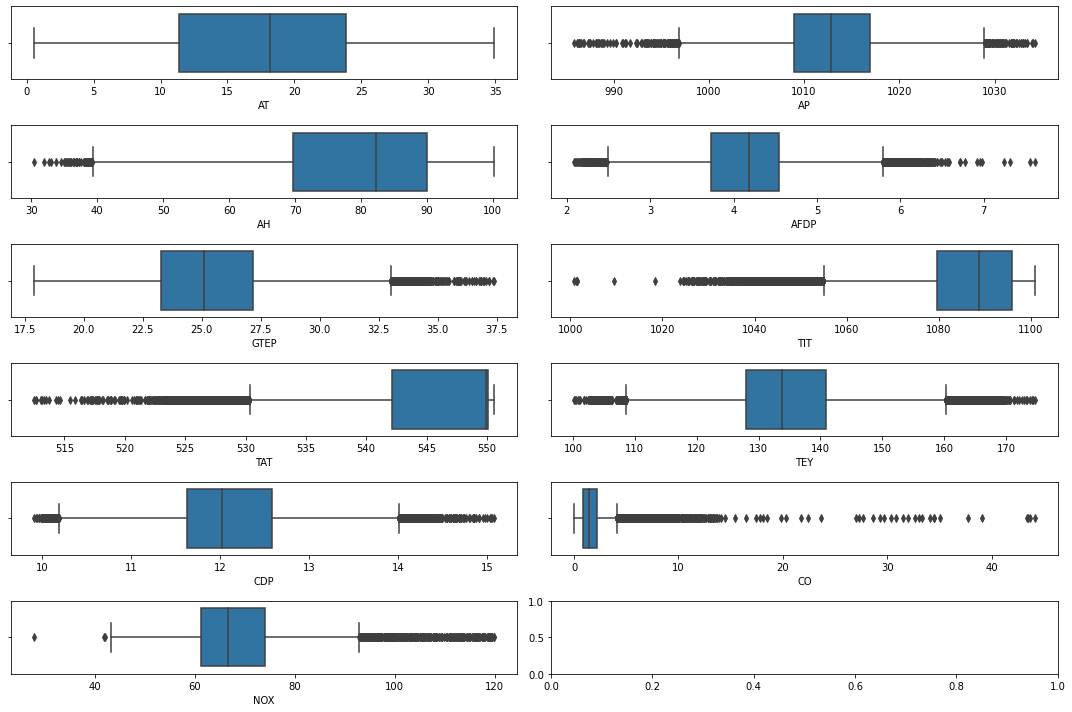

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Finding the outliers for each columns

fig, ax = plt.subplots(6, 2, figsize=(15,10))

sns.boxplot(df.AT, ax=ax[0,0])
sns.boxplot(df.AP, ax=ax[0,1])
sns.boxplot(df.AH, ax=ax[1,0])
sns.boxplot(df.AFDP, ax=ax[1,1])
sns.boxplot(df.GTEP, ax=ax[2,0])
sns.boxplot(df.TIT, ax=ax[2,1])
sns.boxplot(df.TAT, ax=ax[3,0])
sns.boxplot(df.TEY, ax=ax[3,1])
sns.boxplot(df.CDP, ax=ax[4,0])
sns.boxplot(df.CO, ax=ax[4,1])
sns.boxplot(df.NOX, ax=ax[5,0])

plt.tight_layout()
plt.show()

In [9]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

AT :  (array([], dtype=int64),)
AP :  (array([  112,   113,   114,   115,   116,   117,   118,   119,   120,
         121,   122,   123,   124,   125,   126,   127,   128,   129,
         130,   131,   132,   133,   134,   135,   136,   137,   138,
         580,   581,   962,   963,   964,   965,   966,   967,   968,
         969,   970,   971,   972,   973,   974,   975,   976,   977,
         978,   979,  1215,  1216,  1217,  1218,  1228,  1645,  1646,
        1647,  1648,  1649,  1650,  1651,  1652,  1653,  1654,  1655,
        1656,  1657,  1658,  1659,  1660,  1661,  1662,  1663,  1664,
        1665,  1666,  1667,  1668,  1669,  1670,  1671,  1800,  1801,
        1802,  1803,  1804,  1805,  1806,  1807,  1873,  1874,  1875,
        1876,  1877,  1878,  1879,  1880,  1881,  1882,  1883,  1884,
        1885,  1886,  1887,  1888,  1889,  1890,  1891,  1892,  1893,
        1894,  1895,  1896,  1897,  1898,  1899,  1900,  7009,  7010,
        7011,  7012,  7013,  7014,  701

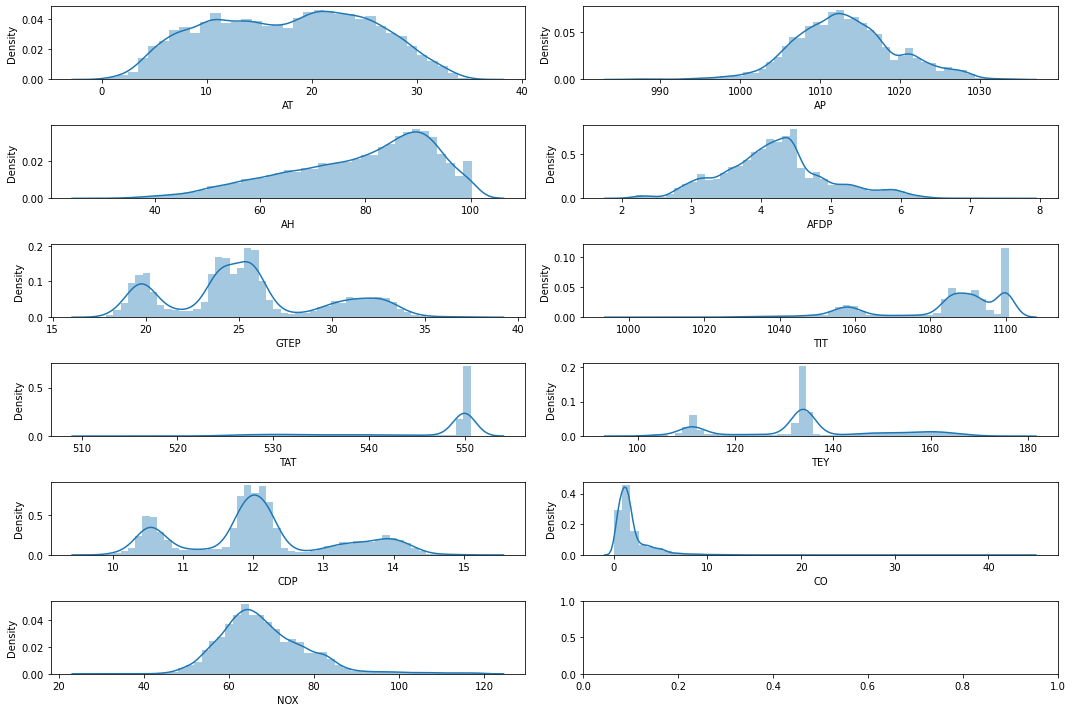

In [10]:
# Checking for normal distribution using distplot

fig, ax = plt.subplots(6, 2, figsize=(15,10))

sns.distplot(df.AT, ax=ax[0,0])
sns.distplot(df.AP, ax=ax[0,1])
sns.distplot(df.AH, ax=ax[1,0])
sns.distplot(df.AFDP, ax=ax[1,1])
sns.distplot(df.GTEP, ax=ax[2,0])
sns.distplot(df.TIT, ax=ax[2,1])
sns.distplot(df.TAT, ax=ax[3,0])
sns.distplot(df.TEY, ax=ax[3,1])
sns.distplot(df.CDP, ax=ax[4,0])
sns.distplot(df.CO, ax=ax[4,1])
sns.distplot(df.NOX, ax=ax[5,0])

plt.tight_layout()
plt.show()

In [11]:
# Correlation

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

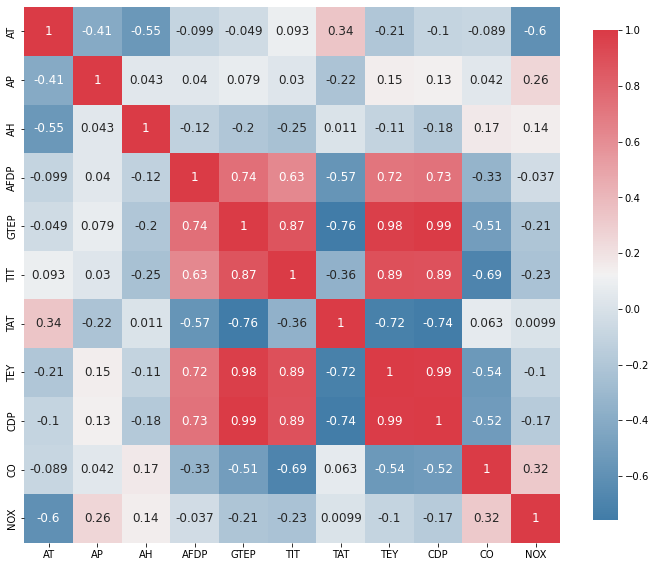

In [12]:
plot_correlation_map(df)

##### Normalising the data using minmax scaler library

In [13]:
scale = MinMaxScaler()
data = pd.DataFrame(scale.fit_transform(df), columns = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX'])
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [14]:
x = df.drop(axis = 0, columns = 'TEY').values
y = df['TEY'].values

In [15]:
x

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [16]:
y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

##### Fixing a random seed for ensuring that the algorithm produces the same accuracy by selecting a similar sample, everytime, it runs the code

In [17]:
seed = 7
np.random.seed(seed)

##### Constructing a Sequential neural network with 12 neurons in the first input layer, 8 neurons in the hidden layer and 1 neuron in the output layer

In [18]:
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

##### Compiling the model and using Mean squared error as the loss function and adam as the weight optimizer

In [19]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
# Fit the model

model.fit(x, y, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
1008/1008 [==============================] - 5s 2ms/step - loss: 18292.1934 - accuracy: 0.0000e+00 - val_loss: 17380.0742 - val_accuracy: 0.0000e+00
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 18290.0410 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 18290.0332 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 18290.0293 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 18290.0234 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 6/100
1008/1008 [==============================] - 1s 1ms/step - loss: 18290.0371 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 1s 1ms/step - loss: 18290.0254 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 52/100
1008/1008 [==============================] - 2s 1ms/step - loss: 18290.0195 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0254 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0312 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0195 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0137 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 57/100
1008/1008 [=================

In [21]:
# Evaluate model

scores = model.evaluate(x, y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 17989.7324 - accuracy: 0.0000e+00
accuracy: 0.00%


In [22]:
history = model.fit(x, y, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0176 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0254 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0273 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0371 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0156 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0234 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0234 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0273 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0273 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0312 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0215 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0215 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 57/100
1008/1008 [=================

##### List all the data in history

In [23]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### Summarize history for accuracy

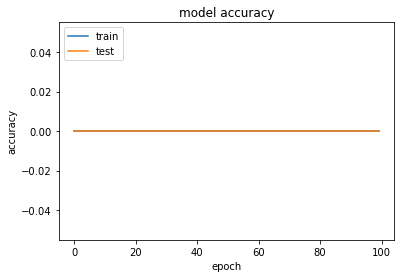

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Summarize history for loss

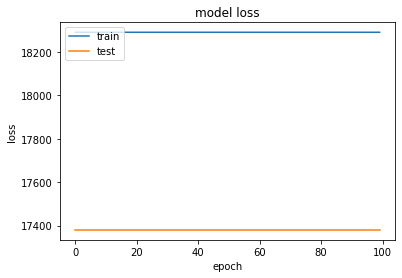

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Tuning of Hyperparameters :- Batch Size and Epochs

##### Creating a user defined function, that has the neural network model and compiles the model with the loss function and weight optimizers

In [26]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])
    return model

##### Using Gridsearch CV, to find the best parameters, that contributes to higher accuracy of Regression, by passing in the user defined model function

In [27]:
model = KerasClassifier(build_fn = create_model, verbose = 0)
batch_size = [10, 20, 40]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(x, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  13.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  11.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  12.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  12.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  12.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

##### Conclusion:

- This is a regression problem, our evaluation metric is MSE.
- Aim is to reduce the MSE value between the original and the predicted.